## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how="inner", on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_results_group_df= study_results.groupby(['Mouse ID', 'Timepoint']).agg({"Tumor Volume (mm3)": "count"}).reset_index()
dups=list(study_results_group_df["Mouse ID"].loc[study_results_group_df["Tumor Volume (mm3)"]>1].drop_duplicates().reset_index(drop=True))
dups

['g989']

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data["Mouse ID"].isin(dups)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_cleaned=combined_data[~combined_data["Mouse ID"].isin(dups)].reset_index(drop=True)
combined_data_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
combined_data_cleaned["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_group= combined_data_cleaned.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_stats_mean= drug_regimen_group["Tumor Volume (mm3)"].mean()
regimen_stats_median= drug_regimen_group["Tumor Volume (mm3)"].median()
regimen_stats_var= drug_regimen_group["Tumor Volume (mm3)"].var()
regimen_stats_std= drug_regimen_group["Tumor Volume (mm3)"].std()
regimen_stats_sem= drug_regimen_group["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
regimen_stats_full = pd.DataFrame({"mean": regimen_stats_mean,
                                  "median": regimen_stats_median,
                                  "var": regimen_stats_var,
                                  "std": regimen_stats_std,
                                  "sem": regimen_stats_sem})
regimen_stats_full

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
# regimen_stats= combined_data_cleaned.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
regimen_stats= combined_data_cleaned.groupby("Drug Regimen").agg(mean= ("Tumor Volume (mm3)", "mean"),
                                                         median = ("Tumor Volume (mm3)", "median"),
                                                         var = ("Tumor Volume (mm3)", "var"),
                                                         std = ("Tumor Volume (mm3)", "std"),
                                                         sem = ("Tumor Volume (mm3)", "sem"))

regimen_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

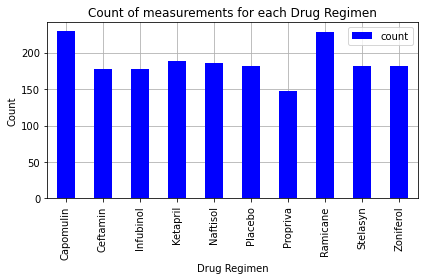

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurement_count = pd.DataFrame(drug_regimen_group.agg(count = ("Drug Regimen", "count")))
measurement_chart = measurement_count.plot(kind='bar', title="Count of measurements for each Drug Regimen", color="blue", zorder=3)

# Set labels for axes & title for the chart
measurement_chart.set_xlabel("Drug Regimen")
measurement_chart.set_ylabel("Count")
measurement_chart.grid(zorder = 0)
plt.tight_layout()

# # Display the plot
plt.show()

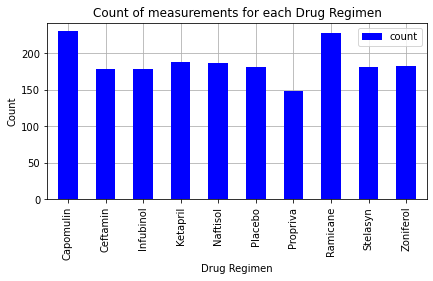

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_regimen_group))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(6.8,3.25))
plt.bar(x_axis, measurement_count["count"], color='blue', align="center", width = 0.52, zorder = 3)
plt.xticks(tick_locations, list(measurement_count.index), rotation="vertical")

# Set limits for x & y axes
plt.xlim(-0.55, len(x_axis)-0.45)
plt.ylim(0, max(measurement_count["count"])*1.05)

# Set labels for axes & title for the chart
plt.title("Count of measurements for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

# Creating and displaying legend
column_name = ["count"]
plt.legend(column_name,loc="best")
plt.grid(zorder=0)

# Display the plot
plt.savefig("Images/bar_chart.png")
plt.show()

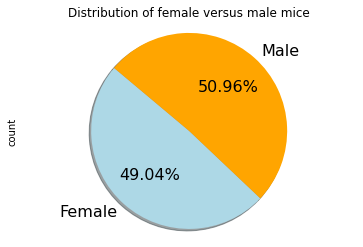

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = combined_data_cleaned.groupby("Sex")
gender_group_count = pd.DataFrame(gender_group.agg(count = ("Sex", "count")))

# Create pie chart 
gender_group_count.plot(kind="pie", y="count",
                        title="Distribution of female versus male mice",startangle=140,
                        autopct='%1.2f%%',shadow=True, fontsize=16, colors =["lightblue","orange"],legend =False)
plt.axis("equal")
plt.show()

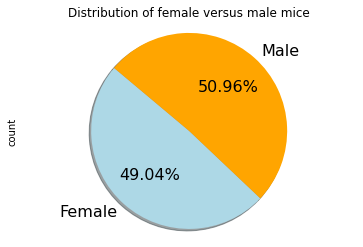

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(gender_group_count.index.values)
gender_counts = gender_group_count["count"]
colors = ["lightblue", "orange"]

# Create pie chart 
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=140, textprops={'fontsize': 16})
plt.rcParams['font.size'] = 10

# Set labels for axes & title for the chart
plt.title("Distribution of female versus male mice")
plt.ylabel("count")
plt.axis("equal")
plt.savefig("Images/pie_chart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
sliced_combined_df = combined_data_cleaned[combined_data_cleaned['Drug Regimen'].isin(drug_regimen_list)]
latest_timepoint_for_mouse = pd.DataFrame(sliced_combined_df.groupby("Mouse ID")["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
latest_timepoint_record = pd.merge(combined_data_cleaned, latest_timepoint_for_mouse, how= "inner",on=["Mouse ID", "Timepoint"])
latest_timepoint_record

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
95,t565,45,34.455298,0,Capomulin,Female,20,17
96,i557,45,47.685963,1,Capomulin,Female,1,24
97,m957,45,33.329098,1,Capomulin,Female,3,19
98,f966,20,30.485985,0,Capomulin,Male,16,17


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_regimen_list: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    latest_treatments = latest_timepoint_record["Tumor Volume (mm3)"].loc[latest_timepoint_record["Drug Regimen"] == drug]
    
    # add subset 
    final_tumor_vol.append(latest_treatments)
    
    # Calculate quartiles for each drug
    quartiles = latest_treatments.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Print IQR for each drug
    print(f'IQR for {drug}: {iqr}')
    
    # Calculate upper and lower bounds for each drug
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Print lower and upper bounds for each drug
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Determine outliers using upper and lower bounds
    outliers_count = (latest_treatments.loc[(latest_timepoint_record['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (latest_timepoint_record['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    # Print outliers for each drug
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


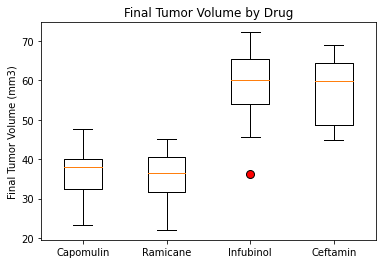

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot(final_tumor_vol, flierprops=flierprops)

# Set labels for axes & title for the chart
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')

# Renaming x-axis ticknames
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.savefig("Images/box_chart.png")
plt.show()

## Line and Scatter Plots

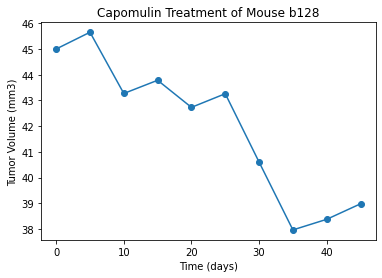

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = combined_data_cleaned.loc[combined_data_cleaned['Mouse ID'] == 'b128']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Set labels for axes & title for the chart
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")
plt.show()

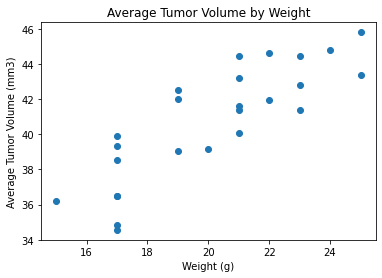

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Create a dataframe that holds average tumor value with weights for each mouse
capomulin_df = combined_data_cleaned.loc[combined_data_cleaned['Drug Regimen'] == 'Capomulin']
avg_tum_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tum_vol'})
avg_tum_vol_df = pd.merge(capomulin_df,avg_tum_vol_df, how = "inner", on = ["Mouse ID"])
avg_tum_vol_df = avg_tum_vol_df[["Mouse ID", "Weight (g)", "avg_tum_vol"]].drop_duplicates().reset_index()

# Assigning axes
x = avg_tum_vol_df['Weight (g)']
y = avg_tum_vol_df['avg_tum_vol']

plt.scatter(x, y)

# Set labels for axes & title for the chart
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


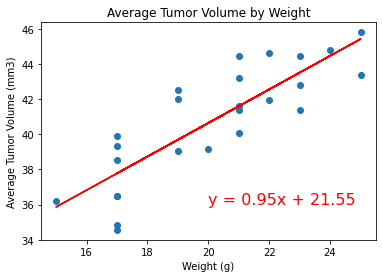

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = avg_tum_vol_df['Weight (g)']
y = avg_tum_vol_df['avg_tum_vol']

correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,36),fontsize=16,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.savefig("Images/scatter_line_plot.png")
plt.show()